<a href="https://colab.research.google.com/github/inusah4/AI4CCEE_Adnan44/blob/main/in_class_activity/lecture6/submissions/Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Activity #1 Using RDDs with Wejo Data in PySpark

In [1]:
# Install pyspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=7e700602903dd837e28122fc78e79eeb18d0bd67b99297f69e3640e5ac04ca49
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder.appName("MyApp").getOrCreate()

# Verify Spark is working
spark

In [3]:
# Load the JSON file into an RDD
wejo_rdd = spark.sparkContext.textFile('wejo.json')

# Inspect the first few lines of the RDD
wejo_rdd.take(5)

['{"dataPointId":"02d77c7e-1ac8-45bc-978f-7c3855f5ff9b","journeyId":"2fe4fae05dd1198d1995d8f9e34d69a5ca1cc8bc","capturedTimestamp":"2023-04-12T19:00:04.000-0500","location":{"latitude":42.497317,"longitude":-90.740595,"geohash":"9zx3z0","postalCode":"52002","regionCode":"IA","countryCode":"US"},"metrics":{"speed":38.01,"heading":359.0},"vehicle":{"wejoVehicleTypeId":8905611058720503136,"status":{"ignitionStatus":"MID_JOURNEY"}}}',
 '{"dataPointId":"03fde858-5922-446a-b68a-00167b866c6e","journeyId":"1183a6bfb3178ba00a4a8585aca72db2d4e689ad","capturedTimestamp":"2023-04-12T19:00:21.000-0500","location":{"latitude":41.658504,"longitude":-93.500216,"geohash":"9zmsbr","postalCode":"50009","regionCode":"IA","countryCode":"US"},"metrics":{"speed":41.47,"heading":90.0},"vehicle":{"wejoVehicleTypeId":-5486746399762838414,"status":{"ignitionStatus":"MID_JOURNEY"}}}',
 '{"dataPointId":"04ce2a2c-d0fd-4197-9416-9324c9a5106c","journeyId":"1c96529d9ccf86042ca98744b3f3b710c247b67d","capturedTimestamp"

In [4]:
import json

In [5]:
# Parse JSON strings into Python dictionaries
wejo_dict_rdd = wejo_rdd.map(lambda x: json.loads(x))

In [6]:
# View the first few dictionaries
wejo_dict_rdd.take(5)

[{'dataPointId': '02d77c7e-1ac8-45bc-978f-7c3855f5ff9b',
  'journeyId': '2fe4fae05dd1198d1995d8f9e34d69a5ca1cc8bc',
  'capturedTimestamp': '2023-04-12T19:00:04.000-0500',
  'location': {'latitude': 42.497317,
   'longitude': -90.740595,
   'geohash': '9zx3z0',
   'postalCode': '52002',
   'regionCode': 'IA',
   'countryCode': 'US'},
  'metrics': {'speed': 38.01, 'heading': 359.0},
  'vehicle': {'wejoVehicleTypeId': 8905611058720503136,
   'status': {'ignitionStatus': 'MID_JOURNEY'}}},
 {'dataPointId': '03fde858-5922-446a-b68a-00167b866c6e',
  'journeyId': '1183a6bfb3178ba00a4a8585aca72db2d4e689ad',
  'capturedTimestamp': '2023-04-12T19:00:21.000-0500',
  'location': {'latitude': 41.658504,
   'longitude': -93.500216,
   'geohash': '9zmsbr',
   'postalCode': '50009',
   'regionCode': 'IA',
   'countryCode': 'US'},
  'metrics': {'speed': 41.47, 'heading': 90.0},
  'vehicle': {'wejoVehicleTypeId': -5486746399762838414,
   'status': {'ignitionStatus': 'MID_JOURNEY'}}},
 {'dataPointId': '04

In [11]:
# Extract latitude, longitude, and speed from each dictionary
extracted_info_rdd = wejo_dict_rdd.map(lambda x: {
    'journeyId': x.get('journeyId'),
    'latitude': x.get('location', {}).get('latitude'),
    'longitude': x.get('location', {}).get('longitude'),
    'speed': x.get('metrics', {}).get('speed')
})

In [12]:
# View the first few records with extracted info
extracted_info_rdd.take(5)

[{'journeyId': '2fe4fae05dd1198d1995d8f9e34d69a5ca1cc8bc',
  'latitude': 42.497317,
  'longitude': -90.740595,
  'speed': 38.01},
 {'journeyId': '1183a6bfb3178ba00a4a8585aca72db2d4e689ad',
  'latitude': 41.658504,
  'longitude': -93.500216,
  'speed': 41.47},
 {'journeyId': '1c96529d9ccf86042ca98744b3f3b710c247b67d',
  'latitude': 41.515211,
  'longitude': -94.232996,
  'speed': 36.86},
 {'journeyId': '78a91884d85030415a62dc7e417ebad2271172f4',
  'latitude': 42.502249,
  'longitude': -96.410195,
  'speed': 14.97},
 {'journeyId': '594fc4306bf489d22dd663ca2d2f8e4d68b4881a',
  'latitude': 41.5958361,
  'longitude': -93.73612159999999,
  'speed': 0.0}]

In [13]:
# Filter records with speed > 30
speed_above_30_rdd = extracted_info_rdd.filter(lambda x: x.get('speed') is not None and x['speed'] > 30)

In [14]:
# Count the number of data points where speed > 30
count_above_30 = speed_above_30_rdd.count()

# Print the result
print(f"Number of data points with speed > 30: {count_above_30}")

Number of data points with speed > 30: 2395


In [15]:
# Collect the filtered data points
filtered_data = speed_above_30_rdd.collect()

In [16]:
# Display the filtered data points
for data_point in filtered_data:
    print(data_point)

{'journeyId': '2fe4fae05dd1198d1995d8f9e34d69a5ca1cc8bc', 'latitude': 42.497317, 'longitude': -90.740595, 'speed': 38.01}
{'journeyId': '1183a6bfb3178ba00a4a8585aca72db2d4e689ad', 'latitude': 41.658504, 'longitude': -93.500216, 'speed': 41.47}
{'journeyId': '1c96529d9ccf86042ca98744b3f3b710c247b67d', 'latitude': 41.515211, 'longitude': -94.232996, 'speed': 36.86}
{'journeyId': '58ce2205d57767dc5195b210c64215a3e255fd65', 'latitude': 42.0185, 'longitude': -93.62851, 'speed': 64.51}
{'journeyId': 'c22f59f9c35cbcfd7217c3340eae1129f1c3ddca', 'latitude': 41.555452, 'longitude': -93.633866, 'speed': 55.29}
{'journeyId': 'ca84a74f2899220cbb6c4cdfd5177938ea4de49b', 'latitude': 41.753764, 'longitude': -93.600235, 'speed': 62.2}
{'journeyId': '9118a89139541c2e3f2b21021a6ab9f1bd118c66', 'latitude': 42.536278, 'longitude': -95.190595, 'speed': 63.35}
{'journeyId': 'e057f0ee2cbcf37e7459c013098fa071a46baf01', 'latitude': 42.007963, 'longitude': -93.159676, 'speed': 116.35}
{'journeyId': '0804e37659c4

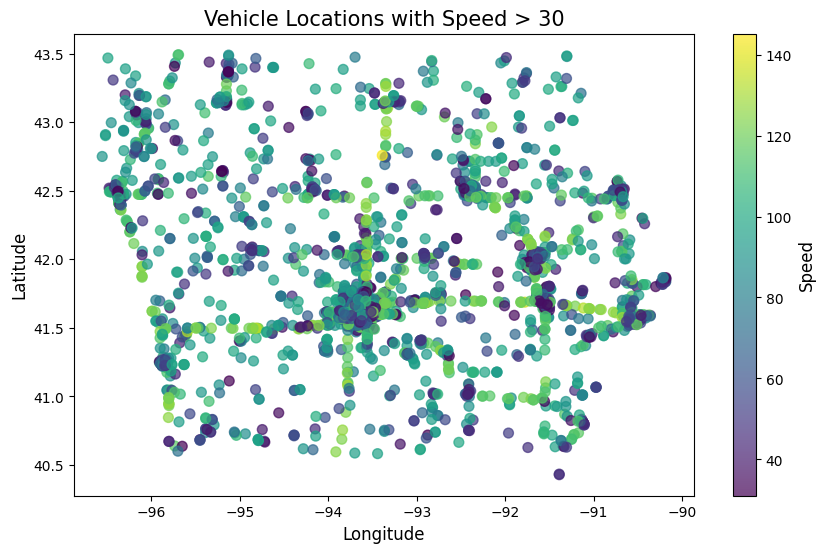

In [17]:
import matplotlib.pyplot as plt

# Collect latitude, longitude, and speed from the filtered data points
latitudes = [data['latitude'] for data in filtered_data if data['latitude'] is not None]
longitudes = [data['longitude'] for data in filtered_data if data['longitude'] is not None]
speeds = [data['speed'] for data in filtered_data if data['speed'] is not None]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c=speeds, cmap='viridis', s=50, alpha=0.7)

# Add labels and title
plt.title('Vehicle Locations with Speed > 30', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Add a color bar to represent speed
cbar = plt.colorbar()
cbar.set_label('Speed', fontsize=12)

# Show the plot
plt.show()

**Discussion**
1. What is the purpose of the RDD transformations and actions?
Transformations [map(), filter() and flatMap()] are operations that return a new RDD by applying a function to each element of the source RDD
Actions [count(), collect(), reduce()] are operations that trigger the execution of all the transformations that have been applied to RDDs and return a final value to write data to storage.

2. How would you modify code to filter by different latitude or heading?
Filter records where latitude is greater than or equal to 40.0
latitude_filtered_rdd = extracted_info_rdd.filter(lambda x: x.get('latitude') is not None and x['latitude'] >= 40.0)

Collect and display the filtered data points
filtered_latitude_data = latitude_filtered_rdd.collect()

Display the filtered data points
for data_point in filtered_latitude_data:
    print(data_point)

Activity #2 Introduction to PySpark

In [18]:
# Activity #2 Introduction to PySpark
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Read data to create dataframe
df = pd.read_csv('apple_stock.csv')

In [20]:
# Inspect dataframe
print(df.head())

         Date        Open        High         Low       Close     Volume  \
0  2010-01-04  213.429998  214.499996  212.380001  214.009998  123432400   
1  2010-01-05  214.599998  215.589994  213.249994  214.379993  150476200   
2  2010-01-06  214.379993  215.230000  210.750004  210.969995  138040000   
3  2010-01-07  211.750000  212.000006  209.050005  210.580000  119282800   
4  2010-01-08  210.299994  212.000006  209.060005  211.980005  111902700   

   Adj Close  
0  27.727039  
1  27.774976  
2  27.333178  
3  27.282650  
4  27.464034  


In [21]:
# number of rows of the dataset
len(df)

1762

In [22]:
print(df.describe())

              Open         High          Low        Close        Volume  \
count  1762.000000  1762.000000  1762.000000  1762.000000  1.762000e+03   
mean    313.076311   315.911288   309.828241   312.927066  9.422578e+07   
std     185.299468   186.898177   183.383917   185.147104  6.020519e+07   
min      90.000000    90.699997    89.470001    90.279999  1.147590e+07   
25%     115.222498   116.362499   114.002500   115.190002  4.917478e+07   
50%     318.230007   320.600008   316.545002   318.240008  8.050385e+07   
75%     470.880017   478.110008   467.972513   472.592512  1.210816e+08   
max     702.409988   705.070023   699.569977   702.100021  4.702495e+08   

         Adj Close  
count  1762.000000  
mean     75.001741  
std      28.574930  
min      24.881912  
25%      50.288540  
50%      72.983145  
75%     100.207243  
max     127.966091  


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1762 non-null   object 
 1   Open       1762 non-null   float64
 2   High       1762 non-null   float64
 3   Low        1762 non-null   float64
 4   Close      1762 non-null   float64
 5   Volume     1762 non-null   int64  
 6   Adj Close  1762 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 96.5+ KB
None


In [24]:
# Selecting key columns from df
selected_columns = df[["Date", "Open", "Close", "Volume"]]

# Display the selected columns
print(selected_columns)

            Date        Open       Close     Volume
0     2010-01-04  213.429998  214.009998  123432400
1     2010-01-05  214.599998  214.379993  150476200
2     2010-01-06  214.379993  210.969995  138040000
3     2010-01-07  211.750000  210.580000  119282800
4     2010-01-08  210.299994  211.980005  111902700
...          ...         ...         ...        ...
1757  2016-12-23  115.589996  116.519997   14249500
1758  2016-12-27  116.519997  117.260002   18296900
1759  2016-12-28  117.519997  116.760002   20905900
1760  2016-12-29  116.449997  116.730003   15039500
1761  2016-12-30  116.650002  115.820000   30586300

[1762 rows x 4 columns]


In [25]:
# Assuming 'df' has columns 'Date', 'Open', and 'Close'

# Calculating daily price change
df['Daily_Price_Change'] = df['Close'] - df['Open']

# Display the DataFrame with 'Date', 'Open', 'Close', and 'Daily_Price_Change'
print(df[['Date', 'Open', 'Close', 'Daily_Price_Change']])


            Date        Open       Close  Daily_Price_Change
0     2010-01-04  213.429998  214.009998            0.580000
1     2010-01-05  214.599998  214.379993           -0.220005
2     2010-01-06  214.379993  210.969995           -3.409998
3     2010-01-07  211.750000  210.580000           -1.170000
4     2010-01-08  210.299994  211.980005            1.680011
...          ...         ...         ...                 ...
1757  2016-12-23  115.589996  116.519997            0.930001
1758  2016-12-27  116.519997  117.260002            0.740005
1759  2016-12-28  117.519997  116.760002           -0.759995
1760  2016-12-29  116.449997  116.730003            0.280006
1761  2016-12-30  116.650002  115.820000           -0.830002

[1762 rows x 4 columns]


In [26]:
# Calculating the average daily volume
average_daily_volume = df['Volume'].mean()

# Display the result
print(f'Average Daily Volume: {average_daily_volume}')

Average Daily Volume: 94225775.87968218


In [27]:
# Finding the maximum closing price
max_close = df['Close'].max()

# Finding the minimum closing price
min_close = df['Close'].min()

# Display the results
print(f'Maximum Closing Price: {max_close}')
print(f'Minimum Closing Price: {min_close}')

Maximum Closing Price: 702.100021
Minimum Closing Price: 90.279999


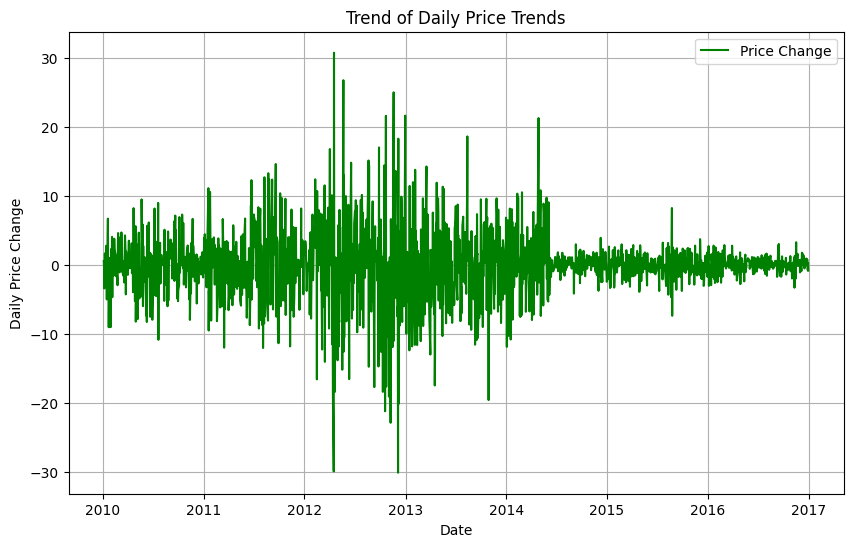

In [28]:
# Ensure that the 'Date' column is in datetime format if not already
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the daily price trends
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Daily_Price_Change'], label='Price Change', color='green')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Daily Price Change')
plt.title('Trend of Daily Price Trends')
plt.grid(True)

# Displaying the plot
plt.legend()
plt.show()

**Discussion**
1. How would you modify code to filter data for specific months or years?
from pyspark.sql.functions import year
Filter DataFrame for rows where the year is 2023
filtered_df_year = df.filter(year(df['timestamp']) == 2023)

from pyspark.sql.functions import month
Filter DataFrame for rows where the month is January (month = 1)
filtered_df_month = df.filter(month(df['timestamp']) == 1)

2. Can you identify the highest daily price increase?

Yes, from the graph or from the code. Both work.

from pyspark.sql.functions import max
Calculate the highest daily price increase
max_daily_increase = df.agg(max('daily price change').alias('max_increase'))


Activity #3 Speed Analysis using PySpark Dataframe

In [ ]:
# Activity #3 Speed Analysis using PySpark Dataframe

In [29]:
# Import SparkSession, functions, and types from PySpark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, DoubleType

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import seaborn for advanced data visualization
import seaborn as sns

# Import logging for logging any errors or information
import logging

# Setting up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Start a Spark session
spark = SparkSession.builder.appName("MyApp").getOrCreate()

logger.info("Spark session started successfully!")

In [30]:
# Import SparkSession
from pyspark.sql import SparkSession

# Initialize the Spark session
spark = SparkSession.builder \
    .appName("My Spark Application") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Verify that Spark session is active
print(spark)

In [45]:
# Load CSV file using PySpark
df = spark.read.csv("ID_31_data.csv", header=True, inferSchema=True)

# Show the first few rows of the DataFrame to verify the data is loaded correctly
df.show(5)

+-------------------+---------+----------+-----------+-------+--------+---+----+--------+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+
|  capturedtimestamp| latitude| longitude|      speed|geohash|   month|day|hour|      ID|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN_AADT_1|MEAN_EXPAN_1|MEAN_PERCE_1|MEAN_MEDIA_1| MEAN_SURFA_1|BUFF_DIST_1|ORIG_FID_1|freq|      date|             Time26|         date_time1|          

In [46]:
from pyspark.sql.types import DoubleType, IntegerType

# Ensure 'speed' is Double and 'ID' is Integer
df = df.withColumn("speed", df["speed"].cast(DoubleType())) \
       .withColumn("ID", df["ID"].cast(IntegerType()))

# Show the schema to verify the changes
df.printSchema()

root
 |-- capturedtimestamp: timestamp (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- speed: double (nullable = true)
 |-- geohash: string (nullable = true)
 |-- month: double (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Custom_ID_left: string (nullable = true)
 |-- index_right: integer (nullable = true)
 |-- Custom_ID_right: string (nullable = true)
 |-- FIRST_ROUT_1: string (nullable = true)
 |-- FIRST_ROAD_1: integer (nullable = true)
 |-- FIRST_MEDI_1: integer (nullable = true)
 |-- FIRST_AADT_1: integer (nullable = true)
 |-- FIRST_NUMB_1: integer (nullable = true)
 |-- MEAN_AADT_1: double (nullable = true)
 |-- MEAN_EXPAN_1: double (nullable = true)
 |-- MEAN_PERCE_1: double (nullable = true)
 |-- MEAN_MEDIA_1: double (nullable = true)
 |-- MEAN_SURFA_1: double (nullable = true)
 |-- BUFF_DIST_1: double (nullable = true)
 |-- ORIG_FID_1: i

In [47]:
from pyspark.sql.functions import to_timestamp

# Convert 'Time26', 'date_time', and 'date_time1' to Spark TimestampType
df = df.withColumn("capturedtimestamp", to_timestamp("capturedtimestamp")) \
       .withColumn("Time26", to_timestamp("Time26")) \
       .withColumn("date_time", to_timestamp("date_time")) \
       .withColumn("date_time1", to_timestamp("date_time1"))

# Show the schema to verify the changes
df.printSchema()

root
 |-- capturedtimestamp: timestamp (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- speed: double (nullable = true)
 |-- geohash: string (nullable = true)
 |-- month: double (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Custom_ID_left: string (nullable = true)
 |-- index_right: integer (nullable = true)
 |-- Custom_ID_right: string (nullable = true)
 |-- FIRST_ROUT_1: string (nullable = true)
 |-- FIRST_ROAD_1: integer (nullable = true)
 |-- FIRST_MEDI_1: integer (nullable = true)
 |-- FIRST_AADT_1: integer (nullable = true)
 |-- FIRST_NUMB_1: integer (nullable = true)
 |-- MEAN_AADT_1: double (nullable = true)
 |-- MEAN_EXPAN_1: double (nullable = true)
 |-- MEAN_PERCE_1: double (nullable = true)
 |-- MEAN_MEDIA_1: double (nullable = true)
 |-- MEAN_SURFA_1: double (nullable = true)
 |-- BUFF_DIST_1: double (nullable = true)
 |-- ORIG_FID_1: i

In [48]:
# Create a new DataFrame with 'day_of_week_name' and 'hour' columns
new_df = df.select("capturedtimestamp", "day", "day_of_week", "hour", "speed")

# Show the new DataFrame
new_df.show()

+-------------------+---+-----------+----+------------------+
|  capturedtimestamp|day|day_of_week|hour|             speed|
+-------------------+---+-----------+----+------------------+
|2022-08-04 06:16:00|  4|   Thursday|   6|       54.40103105|
|2022-08-04 06:16:03|  4|   Thursday|   6|       55.83018435|
|2022-08-04 06:16:06|  4|   Thursday|   6|       54.40103105|
|2022-08-04 06:16:09|  4|   Thursday|   6|       53.68024069|
|2022-08-04 06:16:12|  4|   Thursday|   6|       54.40103105|
|2022-08-04 06:16:15|  4|   Thursday|   6|       54.40103105|
|2022-08-04 06:16:18|  4|   Thursday|   6|55.115607700000005|
|2022-08-04 06:16:21|  4|   Thursday|   6|       53.68024069|
|2022-08-04 06:16:24|  4|   Thursday|   6|       52.96566404|
|2022-08-04 06:16:27|  4|   Thursday|   6|       53.68024069|
|2022-08-04 06:16:30|  4|   Thursday|   6|       55.83018435|
|2022-08-04 06:16:33|  4|   Thursday|   6|       55.83018435|
|2022-08-04 06:16:36|  4|   Thursday|   6|       54.40103105|
|2022-08

In [35]:
from pyspark.sql import functions as F

# Define the speed limit
speed_limit = 50

# Create boolean conditions for speeds over the limit by 5, 10, and 20
df = df.withColumn("over_5", F.col("speed") > (speed_limit + 5))
df = df.withColumn("over_10", F.col("speed") > (speed_limit + 10))
df = df.withColumn("over_20", F.col("speed") > (speed_limit + 20))

# Total number of rows
total_rows = df.count()

# Calculate the fractions
fraction_5_over_limit = df.filter(F.col("over_5")).count() / total_rows
fraction_10_over_limit = df.filter(F.col("over_10")).count() / total_rows
fraction_20_over_limit = df.filter(F.col("over_20")).count() / total_rows * 100

# Show the calculated fractions
print(f"Fraction of entries where speed exceeds limit by 5 or more: {fraction_5_over_limit}")
print(f"Fraction of entries where speed exceeds limit by 10 or more: {fraction_10_over_limit}")
print(f"100 times fraction of entries where speed exceeds limit by 20 or more: {fraction_20_over_limit}")

Fraction of entries where speed exceeds limit by 5 or more: 0.5706776180698152
Fraction of entries where speed exceeds limit by 10 or more: 0.26625990026400703
100 times fraction of entries where speed exceeds limit by 20 or more: 0.0


In [36]:
# Import necessary libraries
from pyspark.sql import functions as F

# Define the speed limit
speed_limit = 50

# Compute the total number of vehicles
total_count = df.count()

# Compute fraction of vehicles exceeding speed limit by 5 mph
fraction_5_over_limit = df.filter(F.col("speed") > speed_limit + 5).count() / total_count

# Compute fraction of vehicles exceeding speed limit by 10 mph
fraction_10_over_limit = df.filter(F.col("speed") > speed_limit + 10).count() / total_count

# Compute 100 times the fraction of vehicles exceeding speed limit by 20 mph
fraction_20_over_limit = df.filter(F.col("speed") > speed_limit + 20).count() / total_count
hundred_fraction_20_over_limit = fraction_20_over_limit * 100

# Display the results
print(f"Fraction of vehicles over limit by 5 mph: {fraction_5_over_limit}")
print(f"Fraction of vehicles over limit by 10 mph: {fraction_10_over_limit}")
print(f"100 * Fraction of vehicles over limit by 20 mph: {hundred_fraction_20_over_limit}")

Fraction of vehicles over limit by 5 mph: 0.5706776180698152
Fraction of vehicles over limit by 10 mph: 0.26625990026400703
100 * Fraction of vehicles over limit by 20 mph: 0.0


In [37]:
# Log the calculated fractions
logger.info(f"Fraction of entries where speed exceeds limit by 5 or more: {fraction_5_over_limit}")
logger.info(f"Fraction of entries where speed exceeds limit by 10 or more: {fraction_10_over_limit}")
logger.info(f"100 times fraction of entries where speed exceeds limit by 20 or more: {hundred_fraction_20_over_limit}")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


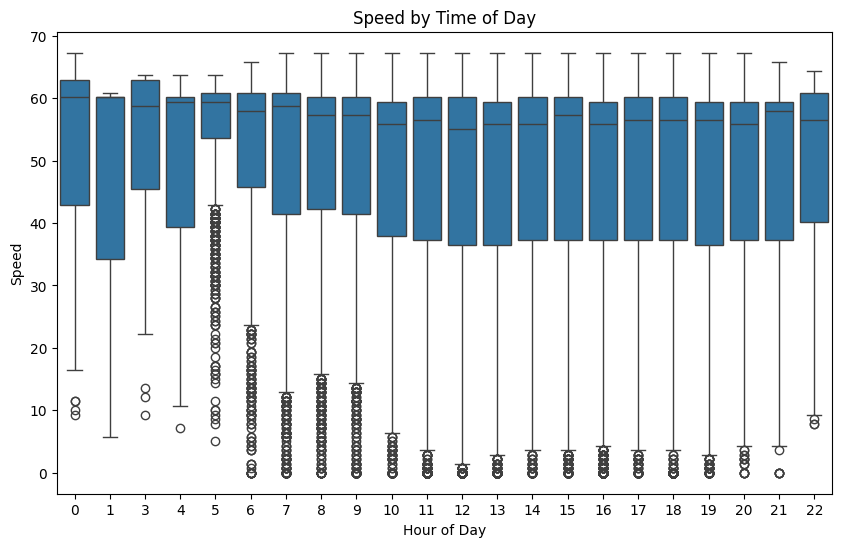

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


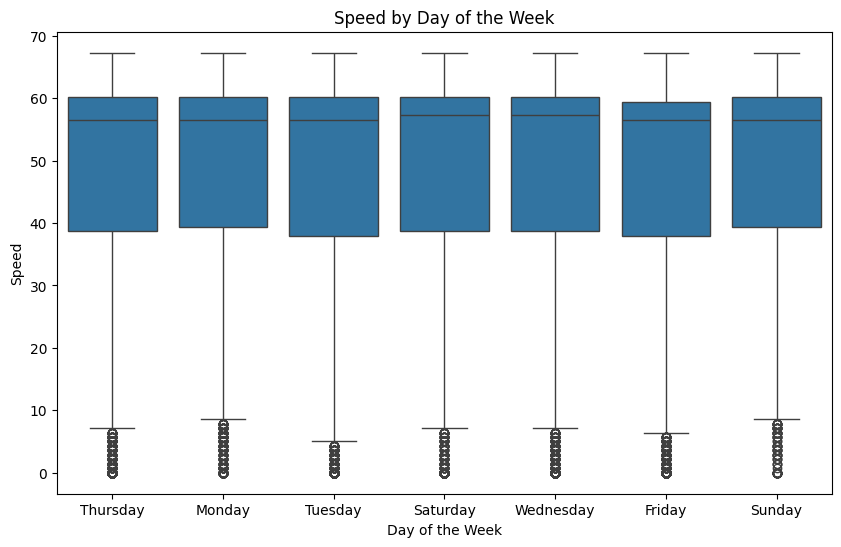

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = new_df.toPandas()

# Create a boxplot for speed by time of day
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='speed', data=pandas_df)
plt.title('Speed by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Speed')
plt.show()

# Create a boxplot for speed by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='speed', data=pandas_df)
plt.title('Speed by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Speed')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


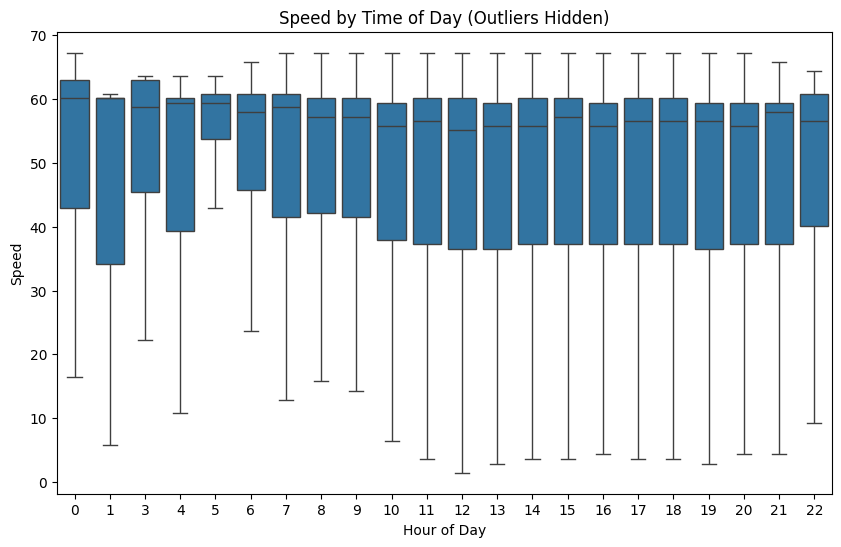

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


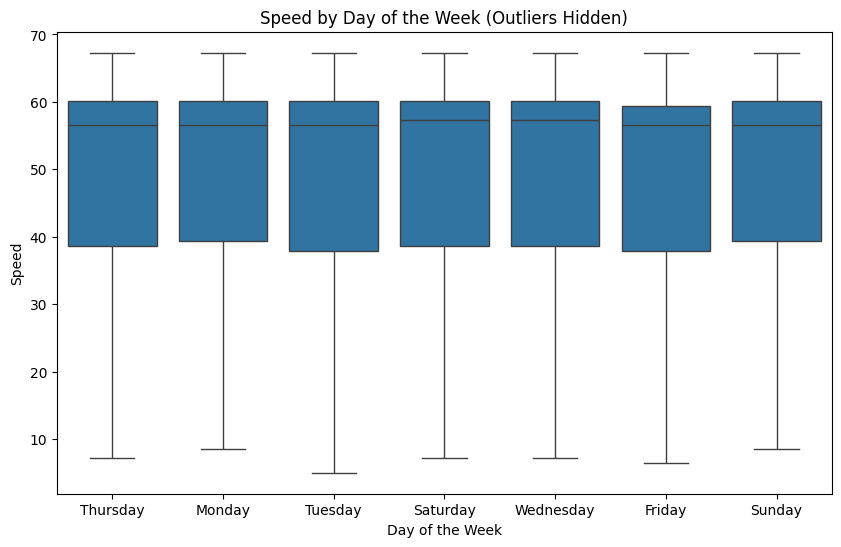

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = new_df.toPandas()

# Create a boxplot for speed by time of day, hiding outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='speed', data=pandas_df, showfliers=False)
plt.title('Speed by Time of Day (Outliers Hidden)')
plt.xlabel('Hour of Day')
plt.ylabel('Speed')
plt.show()

# Create a boxplot for speed by day of the week, hiding outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='speed', data=pandas_df, showfliers=False)
plt.title('Speed by Day of the Week (Outliers Hidden)')
plt.xlabel('Day of the Week')
plt.ylabel('Speed')
plt.show()